<a href="https://colab.research.google.com/github/Hyunggilwoo/CSE422/blob/main/hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import hashlib
import math as m
import time

# h = hashlib.sha256()
# h.update(h_prev)
# h.update(eta)
# h.update(tx)

# hash = int.from_bytes(h.digest(), byteorder='little')

In [ ]:
def adjust_difficulty(average_time, D):
  if elapsed_time < TARGET_TIME:
      D /= 2
  else:
      D *= 2
  return D

In [ ]:
def adjust_gradual_difficulty(average_time, D):
  if elapsed_time < TARGET_TIME:
      D *= 0.9
  else:
      D *= 1.1
  return D

In [ ]:
import hashlib
import time
import random as r

TARGET_TIME = 10.0
BYTE_SIZE = 256

D = int(0.01 * 2**256)

def int_to_bytes(x):
  return x.to_bytes((x.bit_length() + 7) // 8, 'big')

def get_random_bytes(lam : int):
  """
  Generate a random bit string of length lam, and returns it as a bytes object
  """
  return (r.getrandbits(lam)).to_bytes((lam + 7) // 8, 'big')

def dynamic_changing_mining(s=None):
  TARGET_TIME = 10.0
  D = 0.01 * 2 ** BYTE_SIZE

  blockchain = []
  time_elapsed = []
  security_parameter = []

  for i in range(100):
      start_time = time.time()

      # time.sleep(s)
      if not blockchain:

          h_prev = b'\x00' * 32
      else:

          h_prev = int_to_bytes(blockchain[-1][3])

      # generate time sleeper
      if s is None:
        s = r.uniform(0.000, 0.001)
        time.sleep(s)

      eta = get_random_bytes(BYTE_SIZE)
      tx = str(i).encode()
      h = hashlib.sha256()
      h.update(h_prev)
      h.update(eta)
      h.update(tx)

      hash = int.from_bytes(h.digest(), byteorder='big')
      while hash >= D:
          eta = get_random_bytes(BYTE_SIZE)
          h = hashlib.sha256()
          h.update(h_prev)
          h.update(eta)
          h.update(tx)
          hash = int.from_bytes(h.digest(), byteorder='big')

      elapsed_time = time.time() - start_time

      # appending time elapsed log
      time_elapsed.append(elapsed_time)
      # appending security parameter log
      security_parameter.append(D)
      # Append the block as a 4-tuple
      blockchain.append((h_prev, eta, tx, hash))


      print(f'Block {i}, Elapsed time: {elapsed_time}, D: {D}')

      # default changing security parameter
      if elapsed_time < TARGET_TIME:
          D /= 2
      else:
          D *= 2

      # # gradually changing security parameter
      # if elapsed_time < TARGET_TIME:
      #     D *= 0.9
      # else:
      #     D *= 1.1
  return blockchain, time_elapsed, security_parameter


  print(f"Blockchain log : {blockchain}")
  print(f"Time Elapsed : {time_elapsed}")
  print(f"Security parameter : {security_parameter}")



In [ ]:
dynamic_changing_mining()

Block 0, Elapsed time: 0.0008826255798339844, D: 1.157920892373162e+75
Block 1, Elapsed time: 0.00016260147094726562, D: 5.78960446186581e+74
Block 2, Elapsed time: 0.0011031627655029297, D: 2.894802230932905e+74
Block 3, Elapsed time: 0.0007011890411376953, D: 1.4474011154664525e+74
Block 4, Elapsed time: 0.003645181655883789, D: 7.237005577332262e+73
Block 5, Elapsed time: 0.0017731189727783203, D: 3.618502788666131e+73
Block 6, Elapsed time: 0.007379770278930664, D: 1.8092513943330656e+73
Block 7, Elapsed time: 0.009216070175170898, D: 9.046256971665328e+72
Block 8, Elapsed time: 0.021883487701416016, D: 4.523128485832664e+72
Block 9, Elapsed time: 0.050520896911621094, D: 2.261564242916332e+72
Block 10, Elapsed time: 0.10420441627502441, D: 1.130782121458166e+72
Block 11, Elapsed time: 0.24168968200683594, D: 5.65391060729083e+71
Block 12, Elapsed time: 0.71803879737854, D: 2.826955303645415e+71
Block 13, Elapsed time: 1.648909091949463, D: 1.4134776518227075e+71
Block 14, Elapsed 

In [ ]:
dynamic_changing_mining(None)

Block 0, Elapsed time: 0.005884885787963867, D: 1.157920892373162e+75
Block 1, Elapsed time: 7.200241088867188e-05, D: 1.0421288031358459e+75
Block 2, Elapsed time: 0.00021314620971679688, D: 9.379159228222613e+74
Block 3, Elapsed time: 0.0005993843078613281, D: 8.441243305400352e+74
Block 4, Elapsed time: 2.4318695068359375e-05, D: 7.597118974860318e+74
Block 5, Elapsed time: 0.0034165382385253906, D: 6.837407077374286e+74
Block 6, Elapsed time: 0.00021791458129882812, D: 6.153666369636858e+74
Block 7, Elapsed time: 2.3603439331054688e-05, D: 5.538299732673173e+74
Block 8, Elapsed time: 0.0011441707611083984, D: 4.984469759405855e+74
Block 9, Elapsed time: 0.0011696815490722656, D: 4.48602278346527e+74
Block 10, Elapsed time: 0.0006728172302246094, D: 4.0374205051187433e+74
Block 11, Elapsed time: 0.00044798851013183594, D: 3.633678454606869e+74
Block 12, Elapsed time: 0.0003075599670410156, D: 3.270310609146182e+74
Block 13, Elapsed time: 0.00022530555725097656, D: 2.943279548231564e

In [ ]:
# plot a histogram
import numpy as np
import matplotlib.pyplot as plt
import re

text = """
Block 0, Elapsed time: 0.0008826255798339844, D: 1.157920892373162e+75
Block 1, Elapsed time: 0.00016260147094726562, D: 5.78960446186581e+74
Block 2, Elapsed time: 0.0011031627655029297, D: 2.894802230932905e+74
Block 3, Elapsed time: 0.0007011890411376953, D: 1.4474011154664525e+74
Block 4, Elapsed time: 0.003645181655883789, D: 7.237005577332262e+73
Block 5, Elapsed time: 0.0017731189727783203, D: 3.618502788666131e+73
Block 6, Elapsed time: 0.007379770278930664, D: 1.8092513943330656e+73
Block 7, Elapsed time: 0.009216070175170898, D: 9.046256971665328e+72
Block 8, Elapsed time: 0.021883487701416016, D: 4.523128485832664e+72
Block 9, Elapsed time: 0.050520896911621094, D: 2.261564242916332e+72
Block 10, Elapsed time: 0.10420441627502441, D: 1.130782121458166e+72
Block 11, Elapsed time: 0.24168968200683594, D: 5.65391060729083e+71
Block 12, Elapsed time: 0.71803879737854, D: 2.826955303645415e+71
Block 13, Elapsed time: 1.648909091949463, D: 1.4134776518227075e+71
Block 14, Elapsed time: 9.598121404647827, D: 7.067388259113537e+70
Block 15, Elapsed time: 0.9578859806060791, D: 3.533694129556769e+70
Block 16, Elapsed time: 3.4514000415802, D: 1.7668470647783844e+70
Block 17, Elapsed time: 0.721318244934082, D: 8.834235323891922e+69
Block 18, Elapsed time: 2.2190194129943848, D: 4.417117661945961e+69
Block 19, Elapsed time: 210.68183398246765, D: 2.2085588309729805e+69
Block 20, Elapsed time: 9.73547911643982, D: 4.417117661945961e+69
Block 21, Elapsed time: 6.852857351303101, D: 2.2085588309729805e+69
Block 22, Elapsed time: 256.004842042923, D: 1.1042794154864902e+69
Block 23, Elapsed time: 162.83465909957886, D: 2.2085588309729805e+69
Block 24, Elapsed time: 108.17570424079895, D: 4.417117661945961e+69
Block 25, Elapsed time: 75.02117609977722, D: 8.834235323891922e+69
Block 26, Elapsed time: 7.0006537437438965, D: 1.7668470647783844e+70
Block 27, Elapsed time: 0.6667907238006592, D: 8.834235323891922e+69
Block 28, Elapsed time: 8.092879056930542, D: 4.417117661945961e+69
Block 29, Elapsed time: 66.57894396781921, D: 2.2085588309729805e+69
Block 30, Elapsed time: 25.530420064926147, D: 4.417117661945961e+69
Block 31, Elapsed time: 0.8739418983459473, D: 8.834235323891922e+69
Block 32, Elapsed time: 85.89911937713623, D: 4.417117661945961e+69
Block 33, Elapsed time: 43.898465633392334, D: 8.834235323891922e+69
Block 34, Elapsed time: 0.34738588333129883, D: 1.7668470647783844e+70
Block 35, Elapsed time: 17.762250185012817, D: 8.834235323891922e+69
Block 36, Elapsed time: 6.535509824752808, D: 1.7668470647783844e+70
Block 37, Elapsed time: 72.58615970611572, D: 8.834235323891922e+69
Block 38, Elapsed time: 8.569941759109497, D: 1.7668470647783844e+70
Block 39, Elapsed time: 4.719167470932007, D: 8.834235323891922e+69
Block 40, Elapsed time: 32.10711121559143, D: 4.417117661945961e+69
Block 41, Elapsed time: 5.393755674362183, D: 8.834235323891922e+69
Block 42, Elapsed time: 6.963655948638916, D: 4.417117661945961e+69
Block 43, Elapsed time: 24.091002225875854, D: 2.2085588309729805e+69
Block 44, Elapsed time: 1.4934651851654053, D: 4.417117661945961e+69
Block 45, Elapsed time: 37.42436075210571, D: 2.2085588309729805e+69
Block 46, Elapsed time: 6.106940507888794, D: 4.417117661945961e+69
Block 47, Elapsed time: 46.15705990791321, D: 2.2085588309729805e+69
Block 48, Elapsed time: 93.99152731895447, D: 4.417117661945961e+69
Block 49, Elapsed time: 14.187454462051392, D: 8.834235323891922e+69
Block 50, Elapsed time: 7.790483713150024, D: 1.7668470647783844e+70
Block 51, Elapsed time: 34.1117377281189, D: 8.834235323891922e+69
Block 52, Elapsed time: 26.176323652267456, D: 1.7668470647783844e+70
Block 53, Elapsed time: 0.8059799671173096, D: 3.533694129556769e+70
Block 54, Elapsed time: 10.032654762268066, D: 1.7668470647783844e+70
Block 55, Elapsed time: 1.4244461059570312, D: 3.533694129556769e+70
Block 56, Elapsed time: 7.094468832015991, D: 1.7668470647783844e+70
Block 57, Elapsed time: 5.168747901916504, D: 8.834235323891922e+69
Block 58, Elapsed time: 9.137587547302246, D: 4.417117661945961e+69
Block 59, Elapsed time: 93.60017323493958, D: 2.2085588309729805e+69
Block 60, Elapsed time: 4.3624818325042725, D: 4.417117661945961e+69
Block 61, Elapsed time: 1.3718976974487305, D: 2.2085588309729805e+69
Block 62, Elapsed time: 155.99738144874573, D: 1.1042794154864902e+69
Block 63, Elapsed time: 48.30100202560425, D: 2.2085588309729805e+69
Block 64, Elapsed time: 35.483802318573, D: 4.417117661945961e+69
Block 65, Elapsed time: 16.07794713973999, D: 8.834235323891922e+69
Block 66, Elapsed time: 11.379781484603882, D: 1.7668470647783844e+70
Block 67, Elapsed time: 12.63323974609375, D: 3.533694129556769e+70
Block 68, Elapsed time: 4.711576461791992, D: 7.067388259113537e+70
Block 69, Elapsed time: 4.3079445362091064, D: 3.533694129556769e+70
Block 70, Elapsed time: 0.46939563751220703, D: 1.7668470647783844e+70
Block 71, Elapsed time: 22.2199227809906, D: 8.834235323891922e+69
Block 72, Elapsed time: 1.749366283416748, D: 1.7668470647783844e+70
Block 73, Elapsed time: 1.023949384689331, D: 8.834235323891922e+69
Block 74, Elapsed time: 10.405930757522583, D: 4.417117661945961e+69
Block 75, Elapsed time: 12.050742626190186, D: 8.834235323891922e+69
Block 76, Elapsed time: 8.617587804794312, D: 1.7668470647783844e+70
Block 77, Elapsed time: 1.3948509693145752, D: 8.834235323891922e+69
Block 78, Elapsed time: 0.08525800704956055, D: 4.417117661945961e+69
Block 79, Elapsed time: 47.770798206329346, D: 2.2085588309729805e+69
Block 80, Elapsed time: 14.832865953445435, D: 4.417117661945961e+69
Block 81, Elapsed time: 1.2434546947479248, D: 8.834235323891922e+69
Block 82, Elapsed time: 41.721935510635376, D: 4.417117661945961e+69
Block 83, Elapsed time: 14.516687393188477, D: 8.834235323891922e+69
Block 84, Elapsed time: 5.147825717926025, D: 1.7668470647783844e+70
Block 85, Elapsed time: 9.41835355758667, D: 8.834235323891922e+69
Block 86, Elapsed time: 27.382126808166504, D: 4.417117661945961e+69
Block 87, Elapsed time: 0.06647205352783203, D: 8.834235323891922e+69
Block 88, Elapsed time: 21.26405620574951, D: 4.417117661945961e+69
Block 89, Elapsed time: 38.80640625953674, D: 8.834235323891922e+69
Block 90, Elapsed time: 3.8273181915283203, D: 1.7668470647783844e+70
Block 91, Elapsed time: 4.310760021209717, D: 8.834235323891922e+69
Block 92, Elapsed time: 19.999847412109375, D: 4.417117661945961e+69
Block 93, Elapsed time: 20.282235860824585, D: 8.834235323891922e+69
Block 94, Elapsed time: 0.2892186641693115, D: 1.7668470647783844e+70
Block 95, Elapsed time: 30.397855281829834, D: 8.834235323891922e+69
Block 96, Elapsed time: 10.676150560379028, D: 1.7668470647783844e+70
Block 97, Elapsed time: 1.099721908569336, D: 3.533694129556769e+70
Block 98, Elapsed time: 9.272087335586548, D: 1.7668470647783844e+70
Block 99, Elapsed time: 10.77241325378418, D: 8.834235323891922e+69
"""

# parse numbers from each element in a list
# regex the number after elapsed time:
# store just the numbers into a list.
# time_elapsed = time_elapsed

# for i in enumerate(time_elapsed):

pattern = r"Elapsed time: (\d+\.\d+)"
matches = re.findall(pattern, text)

elapsed_times = [float(match) for match in matches]



In [ ]:
# plot a histogram of a better security parameter
import numpy as np
import matplotlib.pyplot as plt
import re

text="""
Block 0, Elapsed time: 0.0003273487091064453, D: 1.157920892373162e+75
Block 1, Elapsed time: 0.0001304149627685547, D: 1.0421288031358459e+75
Block 2, Elapsed time: 0.0003418922424316406, D: 9.379159228222613e+74
Block 3, Elapsed time: 0.0009229183197021484, D: 8.441243305400352e+74
Block 4, Elapsed time: 3.337860107421875e-05, D: 7.597118974860318e+74
Block 5, Elapsed time: 0.0009844303131103516, D: 6.837407077374286e+74
Block 6, Elapsed time: 0.00047779083251953125, D: 6.153666369636858e+74
Block 7, Elapsed time: 3.3855438232421875e-05, D: 5.538299732673173e+74
Block 8, Elapsed time: 0.0013544559478759766, D: 4.984469759405855e+74
Block 9, Elapsed time: 0.001211404800415039, D: 4.48602278346527e+74
Block 10, Elapsed time: 0.0006594657897949219, D: 4.0374205051187433e+74
Block 11, Elapsed time: 0.00033164024353027344, D: 3.633678454606869e+74
Block 12, Elapsed time: 0.00023627281188964844, D: 3.270310609146182e+74
Block 13, Elapsed time: 0.0001761913299560547, D: 2.943279548231564e+74
Block 14, Elapsed time: 0.00010061264038085938, D: 2.648951593408408e+74
Block 15, Elapsed time: 0.0004162788391113281, D: 2.3840564340675673e+74
Block 16, Elapsed time: 0.0005633831024169922, D: 2.1456507906608106e+74
Block 17, Elapsed time: 0.0022039413452148438, D: 1.9310857115947295e+74
Block 18, Elapsed time: 0.0018320083618164062, D: 1.7379771404352565e+74
Block 19, Elapsed time: 0.0007622241973876953, D: 1.564179426391731e+74
Block 20, Elapsed time: 0.001980304718017578, D: 1.407761483752558e+74
Block 21, Elapsed time: 0.0008578300476074219, D: 1.266985335377302e+74
Block 22, Elapsed time: 0.0013172626495361328, D: 1.140286801839572e+74
Block 23, Elapsed time: 0.0003352165222167969, D: 1.0262581216556147e+74
Block 24, Elapsed time: 0.0014719963073730469, D: 9.236323094900533e+73
Block 25, Elapsed time: 0.010637044906616211, D: 8.312690785410479e+73
Block 26, Elapsed time: 0.0005171298980712891, D: 7.481421706869432e+73
Block 27, Elapsed time: 0.0007917881011962891, D: 6.733279536182488e+73
Block 28, Elapsed time: 0.004816532135009766, D: 6.05995158256424e+73
Block 29, Elapsed time: 0.004031658172607422, D: 5.4539564243078164e+73
Block 30, Elapsed time: 0.0014984607696533203, D: 4.908560781877035e+73
Block 31, Elapsed time: 0.0018754005432128906, D: 4.4177047036893316e+73
Block 32, Elapsed time: 0.0032792091369628906, D: 3.9759342333203985e+73
Block 33, Elapsed time: 7.987022399902344e-05, D: 3.578340809988359e+73
Block 34, Elapsed time: 0.013555526733398438, D: 3.220506728989523e+73
Block 35, Elapsed time: 0.007380247116088867, D: 2.898456056090571e+73
Block 36, Elapsed time: 0.0009360313415527344, D: 2.608610450481514e+73
Block 37, Elapsed time: 0.02642655372619629, D: 2.3477494054333628e+73
Block 38, Elapsed time: 0.0027496814727783203, D: 2.1129744648900265e+73
Block 39, Elapsed time: 0.0001926422119140625, D: 1.901677018401024e+73
Block 40, Elapsed time: 0.0023298263549804688, D: 1.7115093165609217e+73
Block 41, Elapsed time: 0.0026738643646240234, D: 1.5403583849048296e+73
Block 42, Elapsed time: 0.008277177810668945, D: 1.3863225464143466e+73
Block 43, Elapsed time: 0.0013828277587890625, D: 1.2476902917729119e+73
Block 44, Elapsed time: 0.0495455265045166, D: 1.1229212625956207e+73
Block 45, Elapsed time: 0.034986019134521484, D: 1.0106291363360587e+73
Block 46, Elapsed time: 0.0023186206817626953, D: 9.09566222702453e+72
Block 47, Elapsed time: 0.0009593963623046875, D: 8.186096004322078e+72
Block 48, Elapsed time: 0.015419960021972656, D: 7.367486403889871e+72
Block 49, Elapsed time: 0.005972862243652344, D: 6.6307377635008836e+72
Block 50, Elapsed time: 0.005048274993896484, D: 5.967663987150796e+72
Block 51, Elapsed time: 0.0009446144104003906, D: 5.370897588435716e+72
Block 52, Elapsed time: 0.0016350746154785156, D: 4.833807829592144e+72
Block 53, Elapsed time: 0.010097026824951172, D: 4.3504270466329295e+72
Block 54, Elapsed time: 0.10319685935974121, D: 3.915384341969637e+72
Block 55, Elapsed time: 0.2160046100616455, D: 3.523845907772673e+72
Block 56, Elapsed time: 0.0904231071472168, D: 3.1714613169954058e+72
Block 57, Elapsed time: 0.009873390197753906, D: 2.854315185295865e+72
Block 58, Elapsed time: 0.03247261047363281, D: 2.5688836667662786e+72
Block 59, Elapsed time: 0.061017513275146484, D: 2.311995300089651e+72
Block 60, Elapsed time: 0.03934979438781738, D: 2.0807957700806858e+72
Block 61, Elapsed time: 0.22906088829040527, D: 1.8727161930726172e+72
Block 62, Elapsed time: 0.12300348281860352, D: 1.6854445737653555e+72
Block 63, Elapsed time: 0.13077187538146973, D: 1.5169001163888199e+72
Block 64, Elapsed time: 0.20748090744018555, D: 1.365210104749938e+72
Block 65, Elapsed time: 0.3216845989227295, D: 1.2286890942749443e+72
Block 66, Elapsed time: 0.764000415802002, D: 1.10582018484745e+72
Block 67, Elapsed time: 0.028087615966796875, D: 9.95238166362705e+71
Block 68, Elapsed time: 0.25696229934692383, D: 8.957143497264344e+71
Block 69, Elapsed time: 0.5850729942321777, D: 8.06142914753791e+71
Block 70, Elapsed time: 0.3392448425292969, D: 7.25528623278412e+71
Block 71, Elapsed time: 0.3757946491241455, D: 6.529757609505708e+71
Block 72, Elapsed time: 0.5885004997253418, D: 5.876781848555137e+71
Block 73, Elapsed time: 0.4858736991882324, D: 5.289103663699624e+71
Block 74, Elapsed time: 0.06342005729675293, D: 4.760193297329661e+71
Block 75, Elapsed time: 0.18874859809875488, D: 4.2841739675966955e+71
Block 76, Elapsed time: 0.6760494709014893, D: 3.8557565708370262e+71
Block 77, Elapsed time: 0.7254793643951416, D: 3.470180913753324e+71
Block 78, Elapsed time: 0.03557920455932617, D: 3.1231628223779915e+71
Block 79, Elapsed time: 0.08764338493347168, D: 2.8108465401401925e+71
Block 80, Elapsed time: 1.5759227275848389, D: 2.5297618861261735e+71
Block 81, Elapsed time: 1.5725083351135254, D: 2.276785697513556e+71
Block 82, Elapsed time: 0.40614962577819824, D: 2.0491071277622008e+71
Block 83, Elapsed time: 0.18858003616333008, D: 1.8441964149859808e+71
Block 84, Elapsed time: 1.7408363819122314, D: 1.6597767734873827e+71
Block 85, Elapsed time: 0.6771178245544434, D: 1.4937990961386445e+71
Block 86, Elapsed time: 1.4646415710449219, D: 1.3444191865247801e+71
Block 87, Elapsed time: 1.5794034004211426, D: 1.2099772678723022e+71
Block 88, Elapsed time: 0.16206026077270508, D: 1.088979541085072e+71
Block 89, Elapsed time: 6.261726140975952, D: 9.800815869765649e+70
Block 90, Elapsed time: 5.412518739700317, D: 8.820734282789084e+70
Block 91, Elapsed time: 0.3388807773590088, D: 7.938660854510175e+70
Block 92, Elapsed time: 3.930075168609619, D: 7.144794769059158e+70
Block 93, Elapsed time: 4.529734134674072, D: 6.430315292153243e+70
Block 94, Elapsed time: 1.298433780670166, D: 5.787283762937918e+70
Block 95, Elapsed time: 3.2022247314453125, D: 5.2085553866441263e+70
Block 96, Elapsed time: 0.7326390743255615, D: 4.687699847979714e+70
Block 97, Elapsed time: 8.532186031341553, D: 4.2189298631817425e+70
Block 98, Elapsed time: 2.250659465789795, D: 3.797036876863568e+70
Block 99, Elapsed time: 4.0173869132995605, D: 3.4173331891772113e+70
"""

pattern = r"Elapsed time: (\d+\.\d+)"
matches = re.findall(pattern, text)

elapsed_times2 = [float(match) for match in matches]

In [ ]:
text="""
Block 0, Elapsed time: 0.0013387203216552734, D: 1.157920892373162e+75
Block 1, Elapsed time: 0.0008728504180908203, D: 5.78960446186581e+74
Block 2, Elapsed time: 0.001317739486694336, D: 2.894802230932905e+74
Block 3, Elapsed time: 0.0010881423950195312, D: 1.4474011154664525e+74
Block 4, Elapsed time: 0.0007991790771484375, D: 7.237005577332262e+73
Block 5, Elapsed time: 0.011998653411865234, D: 3.618502788666131e+73
Block 6, Elapsed time: 0.0069849491119384766, D: 1.8092513943330656e+73
Block 7, Elapsed time: 0.007378339767456055, D: 9.046256971665328e+72
Block 8, Elapsed time: 0.007116794586181641, D: 4.523128485832664e+72
Block 9, Elapsed time: 0.2176964282989502, D: 2.261564242916332e+72
Block 10, Elapsed time: 0.024866342544555664, D: 1.130782121458166e+72
Block 11, Elapsed time: 0.03077244758605957, D: 5.65391060729083e+71
Block 12, Elapsed time: 0.34812235832214355, D: 2.826955303645415e+71
Block 13, Elapsed time: 0.8718187808990479, D: 1.4134776518227075e+71
Block 14, Elapsed time: 4.817943572998047, D: 7.067388259113537e+70
Block 15, Elapsed time: 1.4753413200378418, D: 3.533694129556769e+70
Block 16, Elapsed time: 10.058514833450317, D: 1.7668470647783844e+70
Block 17, Elapsed time: 5.721393585205078, D: 3.533694129556769e+70
Block 18, Elapsed time: 18.995266437530518, D: 1.7668470647783844e+70
Block 19, Elapsed time: 9.913622856140137, D: 3.533694129556769e+70
Block 20, Elapsed time: 69.62001585960388, D: 1.7668470647783844e+70
Block 21, Elapsed time: 1.2451653480529785, D: 3.533694129556769e+70
Block 22, Elapsed time: 1.4718661308288574, D: 1.7668470647783844e+70
Block 23, Elapsed time: 71.37044930458069, D: 8.834235323891922e+69
Block 24, Elapsed time: 20.799009561538696, D: 1.7668470647783844e+70
Block 25, Elapsed time: 2.391826868057251, D: 3.533694129556769e+70
Block 26, Elapsed time: 10.966990232467651, D: 1.7668470647783844e+70
Block 27, Elapsed time: 10.875120401382446, D: 3.533694129556769e+70
Block 28, Elapsed time: 1.2965655326843262, D: 7.067388259113537e+70
Block 29, Elapsed time: 3.5131094455718994, D: 3.533694129556769e+70
Block 30, Elapsed time: 2.854403257369995, D: 1.7668470647783844e+70
Block 31, Elapsed time: 102.05044484138489, D: 8.834235323891922e+69
Block 32, Elapsed time: 9.003072500228882, D: 1.7668470647783844e+70
Block 33, Elapsed time: 23.04211187362671, D: 8.834235323891922e+69
Block 34, Elapsed time: 16.938396453857422, D: 1.7668470647783844e+70
Block 35, Elapsed time: 3.9994702339172363, D: 3.533694129556769e+70
Block 36, Elapsed time: 41.50151014328003, D: 1.7668470647783844e+70
Block 37, Elapsed time: 6.295694828033447, D: 3.533694129556769e+70
Block 38, Elapsed time: 5.503734827041626, D: 1.7668470647783844e+70
Block 39, Elapsed time: 0.7349288463592529, D: 8.834235323891922e+69
Block 40, Elapsed time: 33.89034676551819, D: 4.417117661945961e+69
Block 41, Elapsed time: 10.051594972610474, D: 8.834235323891922e+69
Block 42, Elapsed time: 58.23713779449463, D: 1.7668470647783844e+70
Block 43, Elapsed time: 11.340653419494629, D: 3.533694129556769e+70
Block 44, Elapsed time: 7.95250129699707, D: 7.067388259113537e+70
Block 45, Elapsed time: 4.478953123092651, D: 3.533694129556769e+70
Block 46, Elapsed time: 8.105153560638428, D: 1.7668470647783844e+70
Block 47, Elapsed time: 14.679701805114746, D: 8.834235323891922e+69
Block 48, Elapsed time: 32.1717746257782, D: 1.7668470647783844e+70
Block 49, Elapsed time: 22.695576906204224, D: 3.533694129556769e+70
Block 50, Elapsed time: 0.06694412231445312, D: 7.067388259113537e+70
Block 51, Elapsed time: 11.671004295349121, D: 3.533694129556769e+70
Block 52, Elapsed time: 0.9431283473968506, D: 7.067388259113537e+70
Block 53, Elapsed time: 0.598271369934082, D: 3.533694129556769e+70
Block 54, Elapsed time: 12.122968673706055, D: 1.7668470647783844e+70
Block 55, Elapsed time: 20.85900044441223, D: 3.533694129556769e+70
Block 56, Elapsed time: 5.880122661590576, D: 7.067388259113537e+70
Block 57, Elapsed time: 0.24990534782409668, D: 3.533694129556769e+70
Block 58, Elapsed time: 20.472987174987793, D: 1.7668470647783844e+70
Block 59, Elapsed time: 3.8489186763763428, D: 3.533694129556769e+70
Block 60, Elapsed time: 8.154512405395508, D: 1.7668470647783844e+70
Block 61, Elapsed time: 26.550135612487793, D: 8.834235323891922e+69
Block 62, Elapsed time: 37.97815680503845, D: 1.7668470647783844e+70
Block 63, Elapsed time: 7.51504373550415, D: 3.533694129556769e+70
Block 64, Elapsed time: 21.9188232421875, D: 1.7668470647783844e+70
Block 65, Elapsed time: 1.1703753471374512, D: 3.533694129556769e+70
Block 66, Elapsed time: 2.2098352909088135, D: 1.7668470647783844e+70
Block 67, Elapsed time: 23.44089388847351, D: 8.834235323891922e+69
Block 68, Elapsed time: 26.686930179595947, D: 1.7668470647783844e+70
Block 69, Elapsed time: 0.4280095100402832, D: 3.533694129556769e+70
Block 70, Elapsed time: 14.262590408325195, D: 1.7668470647783844e+70
Block 71, Elapsed time: 0.09362912178039551, D: 3.533694129556769e+70
Block 72, Elapsed time: 4.305376052856445, D: 1.7668470647783844e+70
Block 73, Elapsed time: 3.3435745239257812, D: 8.834235323891922e+69
Block 74, Elapsed time: 4.664208650588989, D: 4.417117661945961e+69
Block 75, Elapsed time: 15.012397289276123, D: 2.2085588309729805e+69
Block 76, Elapsed time: 43.041959047317505, D: 4.417117661945961e+69
Block 77, Elapsed time: 20.50382399559021, D: 8.834235323891922e+69
Block 78, Elapsed time: 14.564894437789917, D: 1.7668470647783844e+70
Block 79, Elapsed time: 3.0366034507751465, D: 3.533694129556769e+70
Block 80, Elapsed time: 5.916250944137573, D: 1.7668470647783844e+70
Block 81, Elapsed time: 2.6695897579193115, D: 8.834235323891922e+69
Block 82, Elapsed time: 287.9376525878906, D: 4.417117661945961e+69
Block 83, Elapsed time: 59.08897638320923, D: 8.834235323891922e+69
Block 84, Elapsed time: 1.4881634712219238, D: 1.7668470647783844e+70
Block 85, Elapsed time: 7.214592456817627, D: 8.834235323891922e+69
Block 86, Elapsed time: 45.023863077163696, D: 4.417117661945961e+69
Block 87, Elapsed time: 93.66716194152832, D: 8.834235323891922e+69
Block 88, Elapsed time: 4.886991262435913, D: 1.7668470647783844e+70
Block 89, Elapsed time: 5.086708068847656, D: 8.834235323891922e+69
Block 90, Elapsed time: 2.048773765563965, D: 4.417117661945961e+69
Block 91, Elapsed time: 110.06559920310974, D: 2.2085588309729805e+69
Block 92, Elapsed time: 16.910353183746338, D: 4.417117661945961e+69
Block 93, Elapsed time: 1.9924395084381104, D: 8.834235323891922e+69
Block 94, Elapsed time: 14.697532176971436, D: 4.417117661945961e+69
Block 95, Elapsed time: 65.83432388305664, D: 8.834235323891922e+69
Block 96, Elapsed time: 0.35454416275024414, D: 1.7668470647783844e+70
Block 97, Elapsed time: 39.75076365470886, D: 8.834235323891922e+69
Block 98, Elapsed time: 17.995373487472534, D: 1.7668470647783844e+70
Block 99, Elapsed time: 0.015399694442749023, D: 3.533694129556769e+70
"""
pattern = r"Elapsed time: (\d+\.\d+)"
matches = re.findall(pattern, text)

elapsed_times3 = [float(match) for match in matches]

In [ ]:
def plot_histogram(elapsed_times):
  hist, bin_edges = np.histogram(elapsed_times, bins=20)
  bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
  mean = np.sum(bin_midpoints * hist) / np.sum(hist)
  variance = np.sum(((bin_midpoints - mean) ** 2) * hist ) / np.sum(hist)

  plt.hist(elapsed_times, bins=20, density=False, color='skyblue', edgecolor='black')
  plt.xlabel('Elapsed Block Time')
  plt.ylabel('frequency')
  plt.title('Elapsed Block Time Histogram of Default Security Parameter + Random Sleep Time')

  plt.show()

  print(f"mean : {mean}")
  print(f"variance : {variance}")

In [ ]:
text="""
Block 0, Elapsed time: 0.005884885787963867, D: 1.157920892373162e+75
Block 1, Elapsed time: 7.200241088867188e-05, D: 1.0421288031358459e+75
Block 2, Elapsed time: 0.00021314620971679688, D: 9.379159228222613e+74
Block 3, Elapsed time: 0.0005993843078613281, D: 8.441243305400352e+74
Block 4, Elapsed time: 2.4318695068359375e-05, D: 7.597118974860318e+74
Block 5, Elapsed time: 0.0034165382385253906, D: 6.837407077374286e+74
Block 6, Elapsed time: 0.00021791458129882812, D: 6.153666369636858e+74
Block 7, Elapsed time: 2.3603439331054688e-05, D: 5.538299732673173e+74
Block 8, Elapsed time: 0.0011441707611083984, D: 4.984469759405855e+74
Block 9, Elapsed time: 0.0011696815490722656, D: 4.48602278346527e+74
Block 10, Elapsed time: 0.0006728172302246094, D: 4.0374205051187433e+74
Block 11, Elapsed time: 0.00044798851013183594, D: 3.633678454606869e+74
Block 12, Elapsed time: 0.0003075599670410156, D: 3.270310609146182e+74
Block 13, Elapsed time: 0.00022530555725097656, D: 2.943279548231564e+74
Block 14, Elapsed time: 0.00011444091796875, D: 2.648951593408408e+74
Block 15, Elapsed time: 0.0006422996520996094, D: 2.3840564340675673e+74
Block 16, Elapsed time: 0.0008997917175292969, D: 2.1456507906608106e+74
Block 17, Elapsed time: 0.0031652450561523438, D: 1.9310857115947295e+74
Block 18, Elapsed time: 0.0022706985473632812, D: 1.7379771404352565e+74
Block 19, Elapsed time: 0.0011250972747802734, D: 1.564179426391731e+74
Block 20, Elapsed time: 0.002929210662841797, D: 1.407761483752558e+74
Block 21, Elapsed time: 0.0020296573638916016, D: 1.266985335377302e+74
Block 22, Elapsed time: 0.0019466876983642578, D: 1.140286801839572e+74
Block 23, Elapsed time: 0.0006868839263916016, D: 1.0262581216556147e+74
Block 24, Elapsed time: 0.0016956329345703125, D: 9.236323094900533e+73
Block 25, Elapsed time: 0.009921550750732422, D: 8.312690785410479e+73
Block 26, Elapsed time: 0.00046896934509277344, D: 7.481421706869432e+73
Block 27, Elapsed time: 0.0007121562957763672, D: 6.733279536182488e+73
Block 28, Elapsed time: 0.004178524017333984, D: 6.05995158256424e+73
Block 29, Elapsed time: 0.0037384033203125, D: 5.4539564243078164e+73
Block 30, Elapsed time: 0.0012590885162353516, D: 4.908560781877035e+73
Block 31, Elapsed time: 0.0017235279083251953, D: 4.4177047036893316e+73
Block 32, Elapsed time: 0.0029020309448242188, D: 3.9759342333203985e+73
Block 33, Elapsed time: 8.988380432128906e-05, D: 3.578340809988359e+73
Block 34, Elapsed time: 0.010895490646362305, D: 3.220506728989523e+73
Block 35, Elapsed time: 0.005891084671020508, D: 2.898456056090571e+73
Block 36, Elapsed time: 0.0007662773132324219, D: 2.608610450481514e+73
Block 37, Elapsed time: 0.02284097671508789, D: 2.3477494054333628e+73
Block 38, Elapsed time: 0.0023877620697021484, D: 2.1129744648900265e+73
Block 39, Elapsed time: 0.00015997886657714844, D: 1.901677018401024e+73
Block 40, Elapsed time: 0.0017113685607910156, D: 1.7115093165609217e+73
Block 41, Elapsed time: 0.002280712127685547, D: 1.5403583849048296e+73
Block 42, Elapsed time: 0.0051555633544921875, D: 1.3863225464143466e+73
Block 43, Elapsed time: 0.0018758773803710938, D: 1.2476902917729119e+73
Block 44, Elapsed time: 0.0400393009185791, D: 1.1229212625956207e+73
Block 45, Elapsed time: 0.02856278419494629, D: 1.0106291363360587e+73
Block 46, Elapsed time: 0.0013003349304199219, D: 9.09566222702453e+72
Block 47, Elapsed time: 0.0004515647888183594, D: 8.186096004322078e+72
Block 48, Elapsed time: 0.010256767272949219, D: 7.367486403889871e+72
Block 49, Elapsed time: 0.004514932632446289, D: 6.6307377635008836e+72
Block 50, Elapsed time: 0.004384756088256836, D: 5.967663987150796e+72
Block 51, Elapsed time: 0.0008463859558105469, D: 5.370897588435716e+72
Block 52, Elapsed time: 0.0014748573303222656, D: 4.833807829592144e+72
Block 53, Elapsed time: 0.0058269500732421875, D: 4.3504270466329295e+72
Block 54, Elapsed time: 0.09134411811828613, D: 3.915384341969637e+72
Block 55, Elapsed time: 0.18440651893615723, D: 3.523845907772673e+72
Block 56, Elapsed time: 0.06889462471008301, D: 3.1714613169954058e+72
Block 57, Elapsed time: 0.006226778030395508, D: 2.854315185295865e+72
Block 58, Elapsed time: 0.027263164520263672, D: 2.5688836667662786e+72
Block 59, Elapsed time: 0.05083799362182617, D: 2.311995300089651e+72
Block 60, Elapsed time: 0.029095172882080078, D: 2.0807957700806858e+72
Block 61, Elapsed time: 0.1991288661956787, D: 1.8727161930726172e+72
Block 62, Elapsed time: 0.12033820152282715, D: 1.6854445737653555e+72
Block 63, Elapsed time: 0.1233518123626709, D: 1.5169001163888199e+72
Block 64, Elapsed time: 0.18292737007141113, D: 1.365210104749938e+72
Block 65, Elapsed time: 0.2741813659667969, D: 1.2286890942749443e+72
Block 66, Elapsed time: 0.6376690864562988, D: 1.10582018484745e+72
Block 67, Elapsed time: 0.0251314640045166, D: 9.95238166362705e+71
Block 68, Elapsed time: 0.18436574935913086, D: 8.957143497264344e+71
Block 69, Elapsed time: 0.5240271091461182, D: 8.06142914753791e+71
Block 70, Elapsed time: 0.31499767303466797, D: 7.25528623278412e+71
Block 71, Elapsed time: 0.2707700729370117, D: 6.529757609505708e+71
Block 72, Elapsed time: 0.5389542579650879, D: 5.876781848555137e+71
Block 73, Elapsed time: 0.4306056499481201, D: 5.289103663699624e+71
Block 74, Elapsed time: 0.06240105628967285, D: 4.760193297329661e+71
Block 75, Elapsed time: 0.18545079231262207, D: 4.2841739675966955e+71
Block 76, Elapsed time: 0.7740168571472168, D: 3.8557565708370262e+71
Block 77, Elapsed time: 0.6147739887237549, D: 3.470180913753324e+71
Block 78, Elapsed time: 0.03121042251586914, D: 3.1231628223779915e+71
Block 79, Elapsed time: 0.08880972862243652, D: 2.8108465401401925e+71
Block 80, Elapsed time: 1.324251651763916, D: 2.5297618861261735e+71
Block 81, Elapsed time: 1.3298735618591309, D: 2.276785697513556e+71
Block 82, Elapsed time: 0.3387134075164795, D: 2.0491071277622008e+71
Block 83, Elapsed time: 0.17220664024353027, D: 1.8441964149859808e+71
Block 84, Elapsed time: 1.4813144207000732, D: 1.6597767734873827e+71
Block 85, Elapsed time: 0.6100242137908936, D: 1.4937990961386445e+71
Block 86, Elapsed time: 1.235996961593628, D: 1.3444191865247801e+71
Block 87, Elapsed time: 1.1692650318145752, D: 1.2099772678723022e+71
Block 88, Elapsed time: 0.06444025039672852, D: 1.088979541085072e+71
Block 89, Elapsed time: 5.806089401245117, D: 9.800815869765649e+70
Block 90, Elapsed time: 4.612936973571777, D: 8.820734282789084e+70
Block 91, Elapsed time: 0.31732940673828125, D: 7.938660854510175e+70
Block 92, Elapsed time: 2.116654634475708, D: 7.144794769059158e+70
Block 93, Elapsed time: 5.334656000137329, D: 6.430315292153243e+70
Block 94, Elapsed time: 1.0931389331817627, D: 5.787283762937918e+70
Block 95, Elapsed time: 2.73734712600708, D: 5.2085553866441263e+70
Block 96, Elapsed time: 0.4884927272796631, D: 4.687699847979714e+70
Block 97, Elapsed time: 7.4874818325042725, D: 4.2189298631817425e+70
Block 98, Elapsed time: 2.055511236190796, D: 3.797036876863568e+70
Block 99, Elapsed time: 2.4557080268859863, D: 3.4173331891772113e+70
"""
pattern = r"Elapsed time: (\d+\.\d+)"
matches = re.findall(pattern, text)

elapsed_times4 = [float(match) for match in matches]

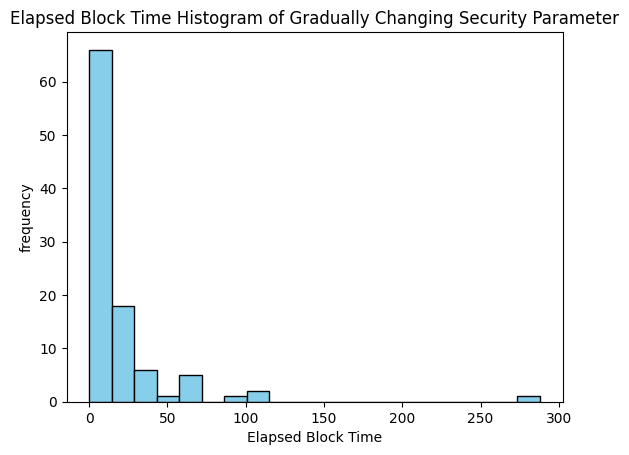

mean : 20.444315771102907
variance : 1122.0718854108084


In [ ]:
plot_histogram(elapsed_times3)

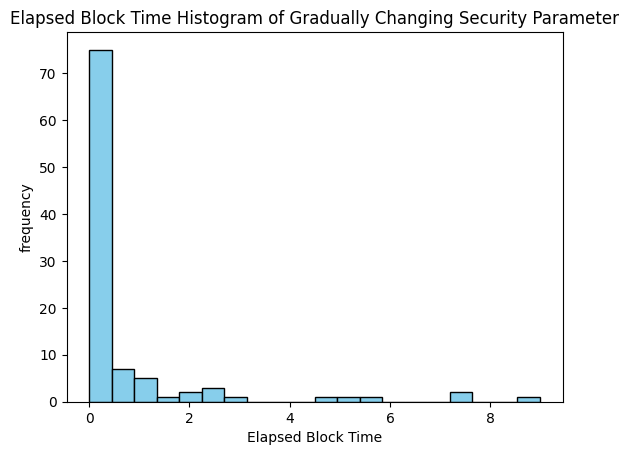

mean : 0.8225407791137695
variance : 2.5046788609367376


In [ ]:
plot_histogram(elapsed_times4)

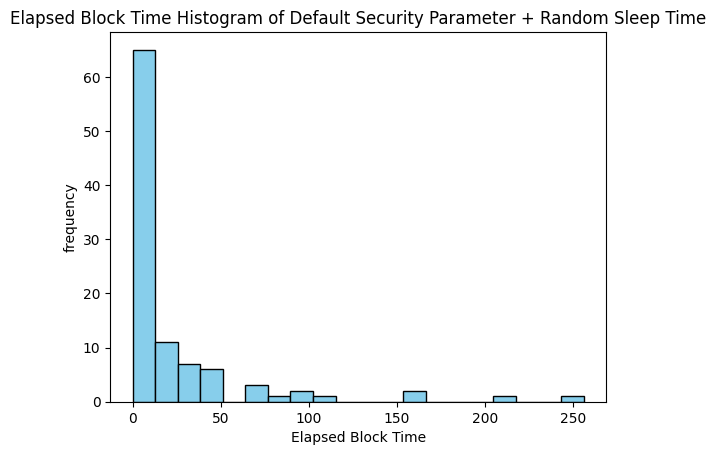

mean : 24.96061884701252
variance : 1737.9963361649448


In [ ]:
# print(elapsed_times)
plot_histogram(elapsed_times)

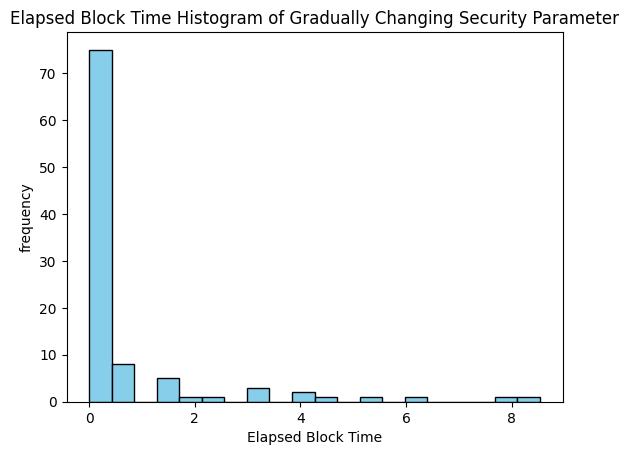

mean : 0.8277128982543945
variance : 2.4034486362419063


In [ ]:
# print(elapsed_times)
plot_histogram(elapsed_times2)